 An ecommerce company sells clothes. They want to know whether they should
 focus their efforts on website or app experience.

In [1]:
#Importing libraries
import pandas as pd
from sklearn.metrics import *
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#Reading the data set
customers=pd.read_csv("C:\\Users\\ABC\\Desktop\\Ecommerce Customers.csv")

In [3]:
#displaying it
customers

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,4483 Jones Motorway Suite 872\r\nLake Jamiefur...,Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\r\nWest Richard, CA ...",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,0787 Andrews Ranch Apt. 633\r\nSouth Chadburgh...,Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\r\nBrendachester, ...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [4]:
#Describing the data
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
#Checking data types
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
#Checking for null values.There are no null values.
customers.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

Exploratory Data Analysis

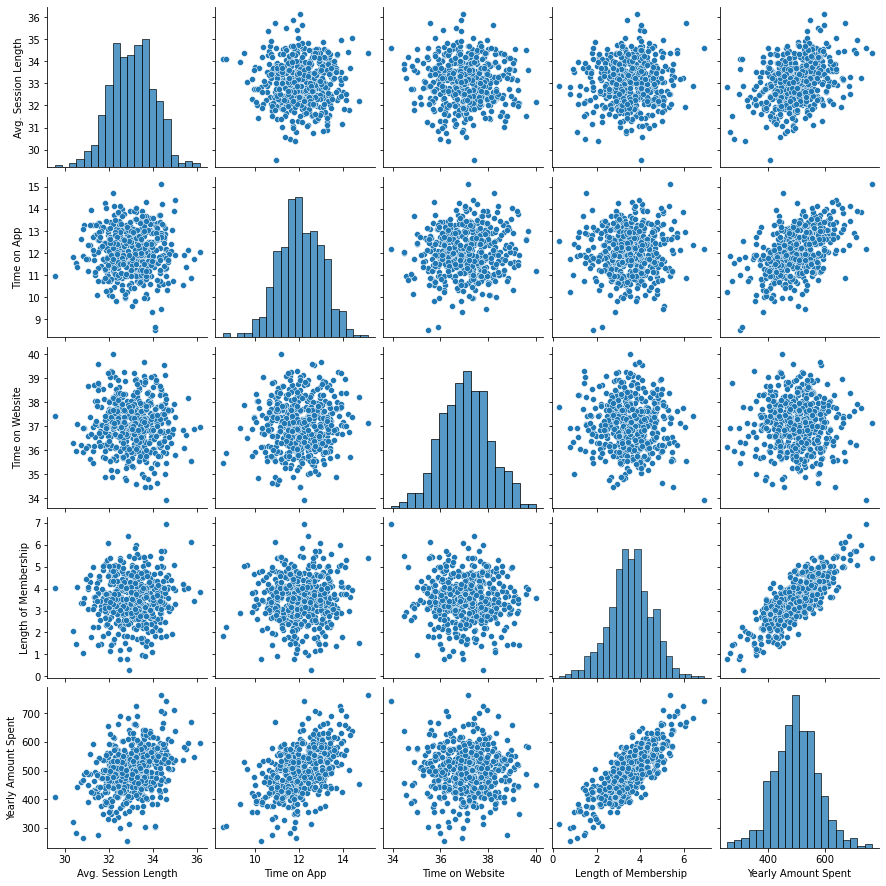

In [7]:
#Plotting pairplot of all numeric dataset to check for outliers.There isn't one in the dataset.
sns.pairplot(customers)

In [8]:
corr=customers.corr()
corr.style.background_gradient()
#From the correlation table we can tell that Length of Membership is the variable most correlated with Yearly Amount Spent. And
#that there is no strong correlations between predictors.

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


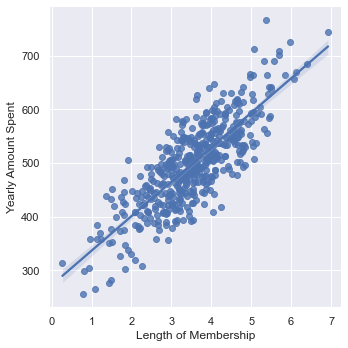

In [9]:
#Creating a linear model model plot for Yearly Amount Spent vs Length of Membership
sns.set(color_codes=True)
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent',data=customers)

In [10]:
#Declaring predictors and target variables
x=customers.drop(['Email','Address','Yearly Amount Spent','Avatar'],axis=1)
y=customers[['Yearly Amount Spent']]

In [11]:
#Doing test train split. Since here we are only using a single linear regression model.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [12]:
lm = LinearRegression()

In [13]:
lm.fit(x_train, y_train)

LinearRegression()

In [14]:
#Printing coefficients
lm.coef_

array([[25.88815047, 38.87046474,  0.47066154, 61.78369022]])

In [15]:
#Checking goodness of fit by using R^2 score
print("R square=",lm.score(x_train,y_train))

R square= 0.9837380400055443


Text(0.5, 0, 'Y test')

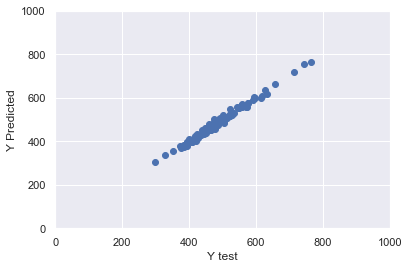

In [16]:
#Creating a scatterplot for predicted vs actual values. We can see that it roughly forms a straight line.
y_pred=lm.predict(x_test)
plt.ylim(0,1000)
plt.xlim(0,1000)
plt.scatter(y_test, lm.predict(x_test))
plt.ylabel('Y Predicted')
plt.xlabel('Y test')

In [17]:
#Evaluating the model using some metrics. We can see that MAPE is very low. Which means it performs well in test data.
print('MSE: {}'.format(mean_squared_error(y_test,y_pred)))
print('MAPE: {}'.format(mean_absolute_percentage_error(y_test,y_pred)))

MSE: 92.89010304498515
MAPE: 0.015969100850355415


In [18]:
residuals=y_test-y_pred

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

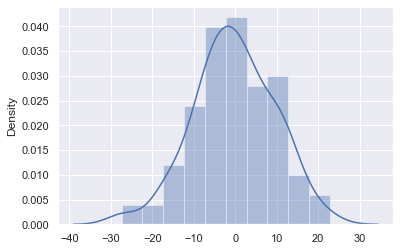

In [19]:
sns.distplot(residuals)#Errors are normally distributed

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Yearly Amount Spent'>

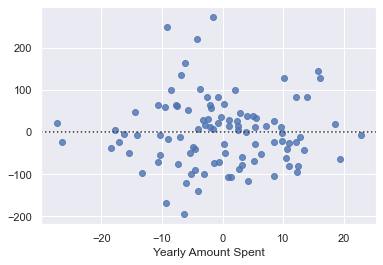

In [20]:
#As we can see residuals are scattered across the graph,so they are independent.
sns.residplot(residuals,y_pred)

In [21]:
l=[]
for i in x:
    l.append(i)
l

['Avg. Session Length',
 'Time on App',
 'Time on Website',
 'Length of Membership']

In [22]:
coef=lm.coef_.tolist()[0]

In [23]:
len(coef)

4

In [24]:
coeftable=pd.DataFrame(coef, l, columns=['Coefficient'])

In [25]:
print(coeftable)

                      Coefficient
Avg. Session Length     25.888150
Time on App             38.870465
Time on Website          0.470662
Length of Membership    61.783690


In [26]:
coeftable.to_csv('Coefficient table for Customers.csv',sep=',')

In [ ]:
#As we can see,the coefficient for time spent on website is negligible compared to that of time spent on app. Therefore company
#should focus on their effort on user experience on their app. But even more than that length of membership influences money spent.